# Импортируем нужные библиотеки для работы с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загружаем csv файл и проверяем загрузку на валидность

### Перед этим составим словарик колонок чтобы понимать что означают те или иные значения

 * uniqueID - уникальный индикатор обзора (техническая колонка, не несет в себе информации) 
 * drugName - название лекарства
 * condition - состояние пациента
 * review - обзор в виде текста
 * rating - рейтинг (число от 1 до 10)
 * date - дата публикации обзора
 * usefulCount - полезность обзора (сколько лайков поставили другие пользователи обзору на сайте)

In [2]:
df = pd.read_csv(r"C:\Users\nicka\Downloads\Telegram Desktop\drug_reviews.csv")
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [3]:
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46


### Копируем данные чтобы не портить первоначальные данные

In [4]:
df_copy = df.copy(deep=True)
df_copy.reset_index(drop=True,inplace=True)

In [5]:
df_copy

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


### Для начала сразу наблюдаем колонку uniqueID которая не несёт в себе полезной информации ведь является лишь id к каждому отзыву

Удаляем её

In [6]:
df_copy = df_copy.drop('uniqueID',axis=1)
df_copy

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


## Далее проводим первоначальные обработки данных на пропуски и дубликаты

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     53766 non-null  object
 1   condition    53471 non-null  object
 2   review       53766 non-null  object
 3   rating       53766 non-null  int64 
 4   date         53766 non-null  object
 5   usefulCount  53766 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ MB


<Axes: >

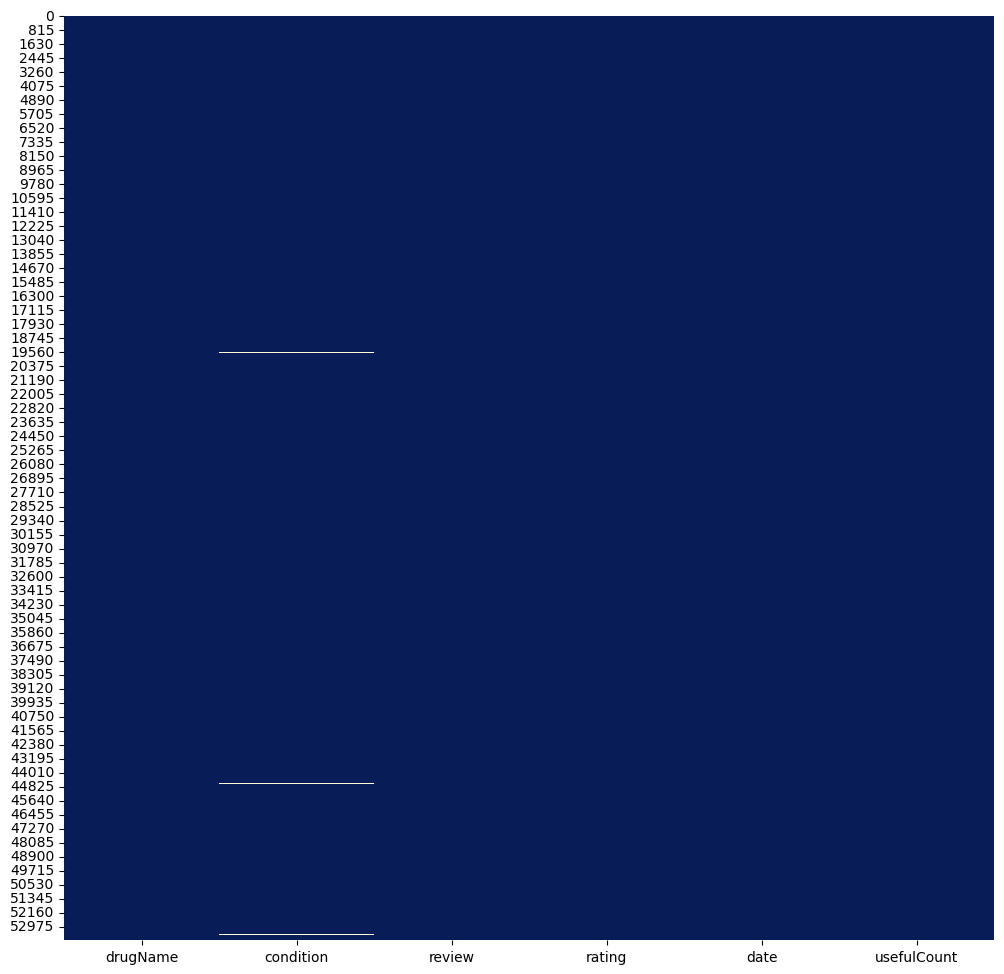

In [8]:
plt.figure(figsize = (12,12))
sns.heatmap(df_copy.isnull(),cmap="YlGnBu_r",cbar=False)

Видим,что в колонке condition есть нулевые объекты

In [9]:
df_copy.condition.isna().sum()

295

Сравнивая количество нулевых значений по сравнению с остальными данными имеет разумным просто удалить строки с Nan, ведь их заполнение практически не повлияет на последующий результат 

Поэтому очищаем их функцией dropna()

In [10]:
df_copy = df_copy.dropna()

И удостоверяемся, что строки очистились

In [11]:
df_copy.shape

(53471, 6)

Далее проверяем на дубликаты:

In [12]:
df_copy.duplicated().sum()

0

Дубликатов не оказалось следовательно очистка не нужна

## Дальше проверяем на выбросы и если нужно уменьшаем их количество чтобы в последующем улучшить обучение модели

In [13]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,53471.0,6.976829,3.286228,1.0,4.0,8.0,10.0,10.0
usefulCount,53471.0,28.083634,36.231706,0.0,6.0,16.0,36.0,949.0


### Сразу видим что максимальное в колонке usefulCount = 949, очевидный выброс, который стоит найти и подчистить

Заодно и посмотрим на выбросы колонку rating

<Axes: >

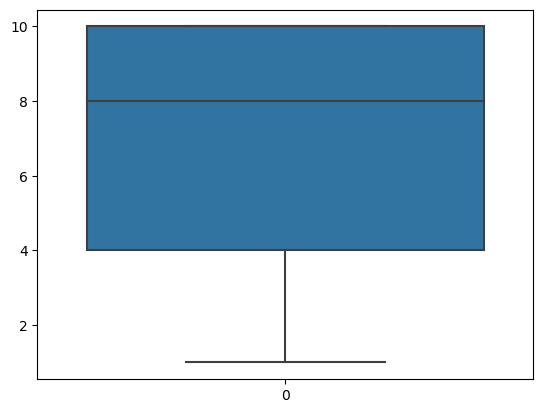

In [14]:
sns.boxplot(data = df_copy['rating'])

Видим что количество записей с большим значением больше чем остальных, ведь наш boxplot смещён вверх.

Проверим наш вывод на гистограмме

<Axes: >

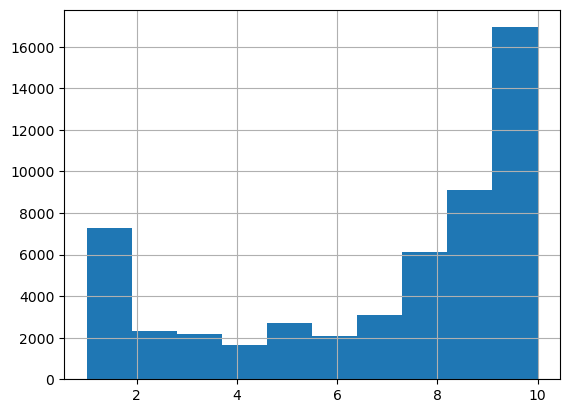

In [15]:
df_copy.rating.hist()

Всё верно, большинство записей у оценки 10, этот дисбаланс по целевой переменной на данном этапе можно исправить путём соиденения строк с оценками, сумма записей которых меньше чем кол-во записей с рейтингом 10, но такое решение зависит от задачи которую мы преследуем

In [16]:
df_copy.loc[(df_copy.rating>=1) & (df_copy.rating<=6),'rating'] = 1
df_copy.loc[(df_copy.rating>=7) & (df_copy.rating<=9),'rating'] = 2
df_copy.loc[df_copy.rating==10,'rating'] = 3

Это кодировка, где 1 == 1-6, 2 == 7-9 и 3 == 10

Проверяем записи

In [17]:
df_copy

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",2,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",2,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",2,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",2,22-Oct-15,4
...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",3,13-Sep-14,43
53762,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",2,8-Oct-16,11
53763,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",2,15-Nov-10,7
53764,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


Проверяем гистограмму

<Axes: >

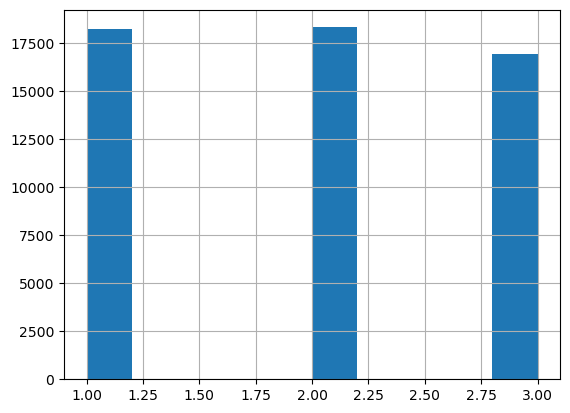

In [18]:
df_copy.rating.hist()

Как видим получилось примерно равное количество записей по каждому из трёх классов

Проверяем количество на цифрах

In [19]:
df_copy.rating.value_counts()

2    18313
1    18221
3    16937
Name: rating, dtype: int64

Смотрим также числовую колонку usefulCount на выбросы

<Axes: >

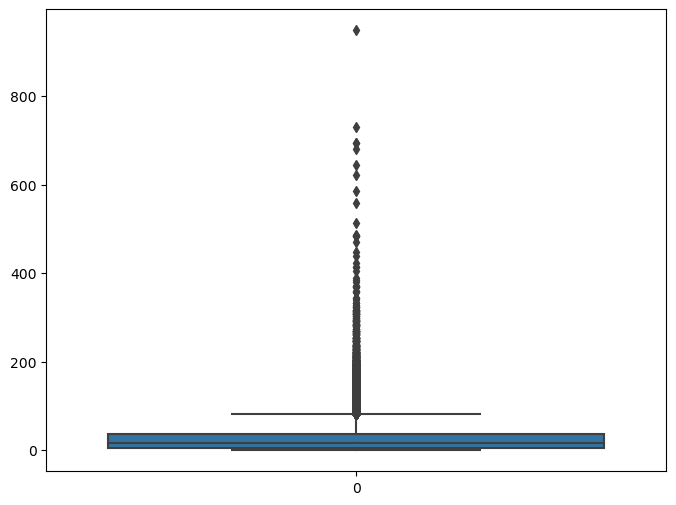

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df_copy['usefulCount'])

Находим по формуле верхнюю границу выбросов по формуле нашего графика boxplot у колонки usefulCount

In [21]:
Q1, Q3 = np.percentile(np.asarray(df_copy['usefulCount']), [25, 75])
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR

Попробуем подчистить эти выбросы, и посмотреть сколько вообще данных останется

In [22]:
df_copy = df_copy[df_copy['usefulCount'] < upper]
df_copy.shape

(49667, 6)

<Axes: >

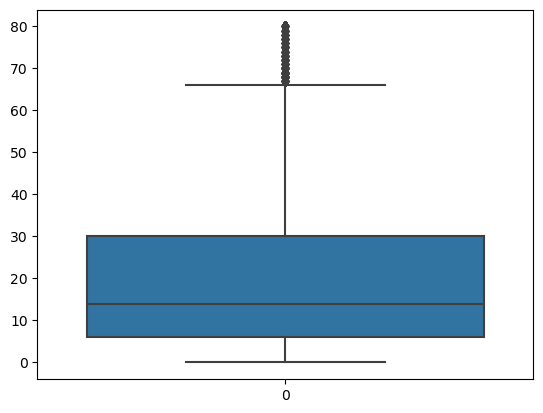

In [23]:
sns.boxplot(data = df_copy['usefulCount'])

Видим что по графику выбросы остались, но из за того что на нём медиана смещена вниз, такое поведение - норма

Далее обновляем индексы для обработанных данных

In [24]:
df_copy.reset_index(drop=True,inplace = True)
df_copy

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",2,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",2,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",2,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",2,22-Oct-15,4
...,...,...,...,...,...,...
49662,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",3,13-Sep-14,43
49663,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",2,8-Oct-16,11
49664,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",2,15-Nov-10,7
49665,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


### В основном в колонках у нас строковые данные, изучаем их уникальные значения:

In [25]:
df_copy.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [26]:
print(df_copy['drugName'].unique().tolist())
len(df_copy['drugName'].unique())

['Mirtazapine', 'Mesalamine', 'Bactrim', 'Contrave', 'Cyclafem 1 / 35', 'Zyclara', 'Copper', 'Amitriptyline', 'Methadone', 'Levora', 'Paroxetine', 'Miconazole', 'Belviq', 'Seroquel', 'Ambien', 'Nuvigil', 'Chantix', 'Microgestin Fe 1 / 20', 'Klonopin', 'Ciprofloxacin', 'Trazodone', 'EnteraGam', 'Aripiprazole', 'Cyclosporine', 'Oxybutynin', 'Lurasidone', 'Clonazepam', 'Ciclopirox', 'Sodium oxybate', 'Lamotrigine', 'Blisovi Fe 1 / 20', 'Ivermectin', 'Suprep Bowel Prep Kit', 'Movantik', 'Actos', 'Duloxetine', 'NuvaRing', 'Escitalopram', 'Tesamorelin', 'Campral', 'Gabapentin', 'Levonorgestrel', 'Aubra', 'Plan B One-Step', 'Ethinyl estradiol / etonogestrel', 'Microgestin Fe 1.5 / 30', 'Wellbutrin', 'Benzoyl peroxide / clindamycin', 'Etonogestrel', 'Nitrofurantoin', 'Ortho Tri-Cyclen Lo', 'Tofacitinib', 'Cryselle', 'Amphetamine / dextroamphetamine', 'Clindamycin', 'Pramipexole', 'Skyla', 'Lastacaft', 'Effexor XR', 'Nifedipine', 'Zoloft', 'Ziprasidone', 'Ethinyl estradiol / norethindrone', 'Al

2616

Как видим у нас огромное количество различных препаратов, которые входят в наш dataframe некоторые по нескольку раз, некоторые только по одному

In [27]:
print(df_copy['condition'].unique().tolist())

['Depression', "Crohn's Disease, Maintenance", 'Urinary Tract Infection', 'Weight Loss', 'Birth Control', 'Keratosis', 'Migraine Prevention', 'Opiate Withdrawal', 'Hot Flashes', 'Vaginal Yeast Infection', 'Schizoaffective Disorde', 'Insomnia', 'Narcolepsy', 'Smoking Cessation', 'Acne', 'Bipolar Disorde', 'Irritable Bowel Syndrome', 'Keratoconjunctivitis Sicca', 'Hyperhidrosis', 'Panic Disorde', 'Onychomycosis, Fingernail', 'Rosacea', 'Bowel Preparation', 'Constipation, Drug Induced', 'Diabetes, Type 2', 'Pain', 'Lipodystrophy', 'Alcohol Dependence', 'Emergency Contraception', 'Major Depressive Disorde', 'Anxiety', 'Bladder Infection', 'Rheumatoid Arthritis', 'Endometriosis', 'ADHD', 'Restless Legs Syndrome', 'Conjunctivitis, Allergic', "Raynaud's Syndrome", 'Schizophrenia', 'Kidney Infections', 'Obesity', 'Nausea/Vomiting', 'Osteoarthritis', 'Motion Sickness', 'High Blood Pressure', 'Psoriatic Arthritis', 'Diabetes, Type 1', 'Interstitial Cystitis', 'Postmenopausal Symptoms', 'Bacteria

Видим в колонке condition странные записи по типу '8</span> users found this comment helpful.'

Перебираем каждый индекс и если они будут похожи на такие странные значения и присваиваем этим значениям nan

In [28]:
for i in range (0,len(df_copy)):
    if 'span' in df_copy['condition'][i]:
        df_copy['condition'][i] = np.nan

C:\Users\nicka\AppData\Local\Temp\ipykernel_24180\3454628846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['condition'][i] = np.nan


А потом зачищаем все строчки с nan значениями

In [29]:
df_copy.dropna(inplace = True)

C:\Users\nicka\AppData\Local\Temp\ipykernel_24180\1009509238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.dropna(inplace = True)


In [30]:
df_copy.shape

(49400, 6)

Проверяем что таких строчек больше нет

In [31]:
print(df_copy['condition'].unique().tolist())

['Depression', "Crohn's Disease, Maintenance", 'Urinary Tract Infection', 'Weight Loss', 'Birth Control', 'Keratosis', 'Migraine Prevention', 'Opiate Withdrawal', 'Hot Flashes', 'Vaginal Yeast Infection', 'Schizoaffective Disorde', 'Insomnia', 'Narcolepsy', 'Smoking Cessation', 'Acne', 'Bipolar Disorde', 'Irritable Bowel Syndrome', 'Keratoconjunctivitis Sicca', 'Hyperhidrosis', 'Panic Disorde', 'Onychomycosis, Fingernail', 'Rosacea', 'Bowel Preparation', 'Constipation, Drug Induced', 'Diabetes, Type 2', 'Pain', 'Lipodystrophy', 'Alcohol Dependence', 'Emergency Contraception', 'Major Depressive Disorde', 'Anxiety', 'Bladder Infection', 'Rheumatoid Arthritis', 'Endometriosis', 'ADHD', 'Restless Legs Syndrome', 'Conjunctivitis, Allergic', "Raynaud's Syndrome", 'Schizophrenia', 'Kidney Infections', 'Obesity', 'Nausea/Vomiting', 'Osteoarthritis', 'Motion Sickness', 'High Blood Pressure', 'Psoriatic Arthritis', 'Diabetes, Type 1', 'Interstitial Cystitis', 'Postmenopausal Symptoms', 'Bacteria

Далее по заданию мы ищем самые популярные вхождения болезней и ищем популярные для них лекарства

In [32]:
df_condi = {}
for st in df_copy['condition'].unique():
    df_condi[st] = df_copy['condition'].value_counts()[st]

Сортируем получившийся словарь

In [33]:
dict(sorted(df_condi.items(), key=lambda item: item[1],reverse = True))

{'Birth Control': 9590,
 'Depression': 2475,
 'Pain': 1920,
 'Acne': 1825,
 'Anxiety': 1575,
 'Bipolar Disorde': 1273,
 'Insomnia': 1139,
 'Weight Loss': 1091,
 'Obesity': 1053,
 'ADHD': 1041,
 'Emergency Contraception': 816,
 'Vaginal Yeast Infection': 806,
 'Diabetes, Type 2': 774,
 'Smoking Cessation': 654,
 'High Blood Pressure': 654,
 'Abnormal Uterine Bleeding': 644,
 'Bowel Preparation': 639,
 'Migraine': 583,
 'Constipation': 504,
 'Major Depressive Disorde': 500,
 'ibromyalgia': 492,
 'Chronic Pain': 433,
 'Anxiety and Stress': 431,
 'Migraine Prevention': 430,
 'Urinary Tract Infection': 406,
 'Panic Disorde': 405,
 'Opiate Dependence': 378,
 'Osteoarthritis': 350,
 'Allergic Rhinitis': 346,
 'Muscle Spasm': 309,
 'Generalized Anxiety Disorde': 306,
 'Bacterial Infection': 302,
 'Irritable Bowel Syndrome': 300,
 'Erectile Dysfunction': 300,
 'Cough': 294,
 'Sinusitis': 281,
 'Nausea/Vomiting': 264,
 'Rheumatoid Arthritis': 260,
 'Hepatitis C': 242,
 'Hyperhidrosis': 238,
 'GE

И выводим часть данных которые соответствуют этим заболеваниям

In [34]:
df_birth = df_copy[df_copy['condition'] == 'Birth Control']
df_birth

,drugName,condition,review,rating,date,usefulCount
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",2,22-Oct-15,4
6,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",1,6-Jun-16,1
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",1,16-Apr-11,3
30,Blisovi Fe 1 / 20,Birth Control,"""I absolutely love this product and recommend ...",3,3-Nov-17,4
36,NuvaRing,Birth Control,"""I was on this for 5 years (and birth control ...",2,17-Jun-11,0
...,...,...,...,...,...,...
49621,Sprintec,Birth Control,"""I unfortunately had to remove my wonderful IU...",1,6-Dec-11,2
49623,Etonogestrel,Birth Control,"""So I got Nexplanon just under a year ago. I o...",2,5-Nov-13,3
49660,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",1,1-Aug-14,15
49661,Apri,Birth Control,"""I started taking Apri about 7 months ago. My ...",2,25-Aug-10,18


### Препараты по Birth Control

In [35]:
df_drugb = {}
for st in df_birth['drugName'].unique():
    df_drugb[st] = df_birth['drugName'].value_counts()[st]
df_drugb = dict(sorted(df_drugb.items(), key=lambda item: item[1],reverse = True))
df_drugb

{'Etonogestrel': 1073,
 'Levonorgestrel': 742,
 'Ethinyl estradiol / norethindrone': 740,
 'Nexplanon': 732,
 'Ethinyl estradiol / norgestimate': 515,
 'Ethinyl estradiol / levonorgestrel': 505,
 'Implanon': 394,
 'Mirena': 348,
 'Skyla': 252,
 'Lo Loestrin Fe': 229,
 'NuvaRing': 202,
 'Copper': 193,
 'Ethinyl estradiol / etonogestrel': 193,
 'Drospirenone / ethinyl estradiol': 163,
 'Sprintec': 162,
 'Desogestrel / ethinyl estradiol': 161,
 'Depo-Provera': 154,
 'Medroxyprogesterone': 154,
 'ParaGard': 140,
 'Ethinyl estradiol / norelgestromin': 135,
 'Microgestin Fe 1 / 20': 105,
 'Norethindrone': 99,
 'Loestrin 24 Fe': 96,
 'Aviane': 84,
 'Yaz': 80,
 'Tri-Sprintec': 79,
 'Lutera': 73,
 'Ortho Evra': 71,
 'TriNessa': 66,
 'Apri': 63,
 'Liletta': 63,
 'Ortho Tri-Cyclen Lo': 57,
 'Junel Fe 1 / 20': 54,
 'Kyleena': 54,
 'Gildess Fe 1 / 20': 47,
 'Xulane': 45,
 'Minastrin 24 Fe': 45,
 'Mononessa': 44,
 'Orsythia': 42,
 'Levora': 41,
 'Ethinyl estradiol / norgestrel': 41,
 'Seasonique': 3

### Препараты по Depression

In [36]:
df_depr = df_copy[df_copy['condition'] == 'Depression']
df_depr

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,28-Feb-12,22
37,Escitalopram,Depression,"""I am a 22 year old female college student. I ...",2,29-Apr-14,32
64,Zoloft,Depression,"""Zoloft did not help me at all. I was on it f...",1,14-Jan-13,51
69,Effexor XR,Depression,"""Sadly only lasted 5 days on Effexor XR. The s...",1,24-Apr-16,18
74,Venlafaxine,Depression,"""I was first prescribed Effexor 13 years ago a...",2,13-Dec-10,36
...,...,...,...,...,...,...
49509,Lexapro,Depression,"""Lexapro quickly lifted me out of depression a...",2,27-Oct-09,12
49510,Vortioxetine,Depression,"""When I started having Brintellix 10mg, nausea...",2,1-May-16,64
49597,Citalopram,Depression,"""Best medication ever I&#039;m on 20 mg .its v...",3,22-Jul-16,43
49627,Maprotiline,Depression,"""I have been taking maprotiline for over 35 ye...",2,19-May-15,10


In [37]:
df_drugd = {}
for st in df_depr['drugName'].unique():
    df_drugd[st] = df_depr['drugName'].value_counts()[st]
df_drugd = dict(sorted(df_drugd.items(), key=lambda item: item[1],reverse = True))
df_drugd

{'Sertraline': 161,
 'Bupropion': 153,
 'Desvenlafaxine': 138,
 'Venlafaxine': 124,
 'Escitalopram': 120,
 'Citalopram': 105,
 'Pristiq': 104,
 'Viibryd': 99,
 'Duloxetine': 98,
 'Vortioxetine': 98,
 'Cymbalta': 88,
 'Lexapro': 83,
 'Vilazodone': 73,
 'Zoloft': 69,
 'Fluoxetine': 69,
 'Celexa': 60,
 'Mirtazapine': 58,
 'Effexor': 56,
 'Wellbutrin': 54,
 'Effexor XR': 53,
 'Trintellix': 51,
 'Prozac': 48,
 'Paroxetine': 43,
 'Abilify': 37,
 'Paxil': 34,
 'Aripiprazole': 34,
 'Wellbutrin XL': 27,
 'Quetiapine': 19,
 'Fetzima': 17,
 'Tranylcypromine': 15,
 'Tramadol': 14,
 'Wellbutrin SR': 14,
 'Levomilnacipran': 14,
 'Alprazolam': 12,
 'Olanzapine': 11,
 'Remeron': 11,
 'Phenelzine': 10,
 'Modafinil': 9,
 'Trazodone': 9,
 'Nortriptyline': 8,
 'Xanax': 8,
 'Seroquel': 7,
 'Nefazodone': 7,
 'Parnate': 7,
 'Amitriptyline': 7,
 'Nardil': 7,
 'Lamotrigine': 7,
 'Methylphenidate': 7,
 'Zyprexa': 6,
 "St. john's wort": 6,
 'L-methylfolate': 6,
 'Brexpiprazole': 5,
 'Desipramine': 5,
 'Serzone':

### Препараты по Pain

In [38]:
df_pain = df_copy[df_copy['condition'] == 'Pain']
df_pain

,drugName,condition,review,rating,date,usefulCount
35,Duloxetine,Pain,"""Been on 30mg Cymbalta for 2 weeks. Started ge...",2,27-Mar-12,32
72,Ultram,Pain,"""I have severe scar tissue and adhesions from ...",3,24-Feb-12,36
79,Acetaminophen / hydrocodone,Pain,"""Was very beneficial when taken with a muscle ...",2,20-Oct-08,21
92,Acetaminophen / hydrocodone,Pain,"""I have been prescribed Vicodin 5/500s for ove...",2,16-Apr-08,15
114,Oxycodone,Pain,"""In 2000 I had 4 surgeries to repair an anal f...",3,10-Sep-08,60
...,...,...,...,...,...,...
49498,Butorphanol,Pain,"""So I was administered this medication when I ...",1,25-Nov-16,2
49538,Hydromorphone,Pain,"""Had a headache from drinking the night before...",3,13-Mar-10,7
49614,Diclofenac,Pain,"""No side effects and back to work in a couple ...",2,3-Oct-08,36
49644,Methadone,Pain,"""Have been taking it for 6 years (120 milligra...",3,2-Aug-11,16


In [39]:
df_drugp = {}
for st in df_pain['drugName'].unique():
    df_drugp[st] = df_pain['drugName'].value_counts()[st]
df_drugp = dict(sorted(df_drugp.items(), key=lambda item: item[1],reverse = True))
df_drugp

{'Tramadol': 132,
 'Acetaminophen / hydrocodone': 115,
 'Acetaminophen / oxycodone': 109,
 'Oxycodone': 89,
 'Hydromorphone': 65,
 'Tapentadol': 64,
 'Diclofenac': 57,
 'Ketorolac': 53,
 'Dilaudid': 52,
 'Gabapentin': 45,
 'OxyContin': 42,
 'Oxymorphone': 41,
 'Fentanyl': 38,
 'Methadone': 37,
 'Nucynta': 37,
 'Percocet': 35,
 'Morphine': 33,
 'Tylenol with Codeine #3': 27,
 'Ultram': 26,
 'Toradol': 26,
 'Vicodin': 24,
 'Lidocaine': 24,
 'Acetaminophen / codeine': 24,
 'Hysingla ER': 23,
 'Norco': 22,
 'Amitriptyline': 21,
 'Celecoxib': 21,
 'Lortab': 20,
 'Hydrocodone / ibuprofen': 20,
 'Voltaren Gel': 20,
 'Flector Patch': 19,
 'Hydrocodone': 18,
 'Cymbalta': 18,
 'Meperidine': 17,
 'Pregabalin': 17,
 'Acetaminophen / propoxyphene': 17,
 'Demerol': 16,
 'Lidoderm': 16,
 'Nucynta ER': 14,
 'Naproxen': 14,
 'Opana ER': 14,
 'Celebrex': 14,
 'Opana': 13,
 'Buprenorphine': 13,
 'Lyrica': 13,
 'Acetaminophen / tramadol': 12,
 'Butorphanol': 12,
 'Etodolac': 11,
 'Duloxetine': 10,
 'Vicop

### Закодируем все столбцы и посмотрим какую корреляцию в себе они несут

In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49400 entries, 0 to 49666
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     49400 non-null  object
 1   condition    49400 non-null  object
 2   review       49400 non-null  object
 3   rating       49400 non-null  int64 
 4   date         49400 non-null  object
 5   usefulCount  49400 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.6+ MB


In [41]:
df_copy

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",2,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",2,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",2,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",2,22-Oct-15,4
...,...,...,...,...,...,...
49662,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",3,13-Sep-14,43
49663,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",2,8-Oct-16,11
49664,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",2,15-Nov-10,7
49665,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [42]:
from sklearn import preprocessing
def encode(ini_df): #Напишем программу для кодировки строковых данных
    results = ini_df.copy()
    encoders = {}
    for column in results.columns:
        if results.dtypes[column] == object:
            encoders[column] = preprocessing.LabelEncoder()
            results[column] = encoders[column].fit_transform(results[column])
    return results,encoders

Но до кодировки сохраним данные об отзывах пользователей для последующего кодирования

In [43]:
review = df_copy['review']
review

0        "I&#039;ve tried a few antidepressants over th...
1        "My son has Crohn&#039;s disease and has done ...
2                            "Quick reduction of symptoms"
3        "Contrave combines drugs that were used for al...
4        "I have been on this birth control for one cyc...
                               ...                        
49662    "I have taken Tamoxifen for 5 years. Side effe...
49663    "I&#039;ve been taking Lexapro (escitaploprgra...
49664    "I&#039;m married, 34 years old and I have no ...
49665    "I was prescribed Nucynta for severe neck/shou...
49666                                        "It works!!!"
Name: review, Length: 49400, dtype: object

In [44]:
encoded_data,encoders=encode(df_copy)
encoded_data

,drugName,condition,review,rating,date,usefulCount
0,1548,157,29992,3,2365,22
1,1476,141,34023,2,1011,17
2,292,611,35682,2,2559,3
3,586,631,3316,2,3045,35
4,615,78,14042,2,1737,4
...,...,...,...,...,...,...
49662,2242,91,17417,3,581,43
49663,876,43,28545,2,3424,11
49664,1339,78,26854,2,789,7
49665,2245,434,24629,1,2423,20


<Axes: >

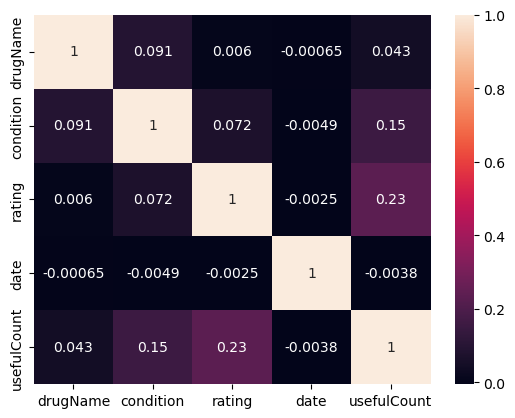

In [45]:
sns.heatmap(encoded_data.drop(columns= 'review').corr(),annot=True)

Нормализуем данные для последующих лучших результатов обучения моделей

In [46]:
k_list = ['usefulCount']
def norm(x):
    x_std = x.copy(deep=True)
    for column in k_list:
        x_std[column] = (x_std[column]-x_std[column].min())/(x_std[column].max()-x_std[column].min())
    return x_std

In [47]:
df_std = norm(encoded_data)
df_std.head()

,drugName,condition,review,rating,date,usefulCount
0,1548,157,29992,3,2365,0.2750
1,1476,141,34023,2,1011,0.2125
2,292,611,35682,2,2559,0.0375
3,586,631,3316,2,3045,0.4375
4,615,78,14042,2,1737,0.0500


Также поработаем с оставшимися данными колонки review, которые являются текстовыми отзывами на каждый препарат

Присваиваем колонке review свою начальную информацию

In [48]:
encoded_data['review'] = review
encoded_data['review']

0        "I&#039;ve tried a few antidepressants over th...
1        "My son has Crohn&#039;s disease and has done ...
2                            "Quick reduction of symptoms"
3        "Contrave combines drugs that were used for al...
4        "I have been on this birth control for one cyc...
                               ...                        
49662    "I have taken Tamoxifen for 5 years. Side effe...
49663    "I&#039;ve been taking Lexapro (escitaploprgra...
49664    "I&#039;m married, 34 years old and I have no ...
49665    "I was prescribed Nucynta for severe neck/shou...
49666                                        "It works!!!"
Name: review, Length: 49400, dtype: object

In [49]:
encoded_data

,drugName,condition,review,rating,date,usefulCount
0,1548,157,"""I&#039;ve tried a few antidepressants over th...",3,2365,22
1,1476,141,"""My son has Crohn&#039;s disease and has done ...",2,1011,17
2,292,611,"""Quick reduction of symptoms""",2,2559,3
3,586,631,"""Contrave combines drugs that were used for al...",2,3045,35
4,615,78,"""I have been on this birth control for one cyc...",2,1737,4
...,...,...,...,...,...,...
49662,2242,91,"""I have taken Tamoxifen for 5 years. Side effe...",3,581,43
49663,876,43,"""I&#039;ve been taking Lexapro (escitaploprgra...",2,3424,11
49664,1339,78,"""I&#039;m married, 34 years old and I have no ...",2,789,7
49665,2245,434,"""I was prescribed Nucynta for severe neck/shou...",1,2423,20


Предобрабатываем данные:

Также приводим полученные слова к нормальной форме и удаляем цифры, которые не сможем извлечь из текстовых данных

In [50]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("english")
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)

    return ' '.join(tokens)


In [51]:
encoded_data['review'] = encoded_data['review'].apply(lemmatize)
encoded_data.reset_index(drop=True,inplace=True)

Векторизируем наши данные библиотекой CountVectorizer

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(encoded_data['review'])
X_counts.shape

(49400, 29960)

Далее из векторной формы мы приводим всё в числа по формуле tf-idf

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(49400, 29960)

И декомпозируем наши данные, ведь поместить каждую из 32438 колонок будет проблемой для нашей оперативной памяти

In [54]:
from sklearn.decomposition import TruncatedSVD
clf = TruncatedSVD(100)
Xpca = clf.fit_transform(X_tfidf)
Xpca

array([[ 0.16537176, -0.06830594, -0.15496476, ..., -0.03272834,
        -0.00673837, -0.03256788],
       [ 0.11727206, -0.04809566, -0.02261309, ...,  0.01050863,
         0.02130897, -0.00636578],
       [ 0.02329844, -0.00698216,  0.00598011, ..., -0.00467763,
        -0.00408205,  0.04777576],
       ...,
       [ 0.30637163,  0.08878629,  0.05908495, ..., -0.06056011,
         0.00265701, -0.05614377],
       [ 0.14513401, -0.13053705,  0.20956713, ...,  0.06011642,
        -0.0912646 ,  0.0395242 ],
       [ 0.1339975 , -0.11496011,  0.08584675, ..., -0.00031964,
         0.01920215,  0.00480237]])

Соединяем наши данные в один датасет

In [55]:
end_data = pd.concat([encoded_data.drop(columns = 'review'),pd.DataFrame(Xpca)],axis=1)
end_data

,drugName,condition,rating,date,usefulCount,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,1548,157,3,2365,22,0.165372,-0.068306,-0.154965,0.073237,0.040335,...,-0.002346,-0.019236,-0.002028,0.010188,-0.001245,-0.000095,-0.012933,-0.032728,-0.006738,-0.032568
1,1476,141,2,1011,17,0.117272,-0.048096,-0.022613,0.031661,0.063584,...,0.018965,-0.013559,0.038888,-0.016640,0.055200,0.026746,0.008754,0.010509,0.021309,-0.006366
2,292,611,2,2559,3,0.023298,-0.006982,0.005980,-0.008047,0.007559,...,-0.005860,-0.087781,-0.012331,0.037342,-0.059184,0.040500,-0.027329,-0.004678,-0.004082,0.047776
3,586,631,2,3045,35,0.183251,0.000132,-0.081022,0.008730,0.045718,...,-0.018176,-0.033237,-0.019407,0.037286,0.024582,-0.036829,0.015488,-0.009030,-0.003841,-0.029604
4,615,78,2,1737,4,0.259831,0.261042,0.007124,0.067253,0.002034,...,-0.014777,-0.024253,-0.001323,-0.012404,0.024494,-0.034140,0.039778,-0.019341,-0.004679,-0.014452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49395,2242,91,3,581,43,0.140615,-0.054126,-0.057671,-0.030774,0.044132,...,-0.010572,-0.004270,0.047370,-0.006866,0.001076,0.006980,-0.018736,-0.003135,-0.010002,0.022762
49396,876,43,2,3424,11,0.258304,-0.078232,-0.099723,-0.053715,-0.036949,...,-0.009578,-0.026130,0.004601,0.001412,-0.003184,0.015697,-0.012993,0.005440,0.002520,-0.023837
49397,1339,78,2,789,7,0.306372,0.088786,0.059085,-0.091350,-0.025955,...,0.046250,-0.008672,-0.038887,0.013374,-0.008389,-0.029092,-0.039626,-0.060560,0.002657,-0.056144
49398,2245,434,1,2423,20,0.145134,-0.130537,0.209567,0.031078,0.107958,...,0.050786,0.070231,-0.041498,-0.033306,0.009439,-0.063863,-0.007608,0.060116,-0.091265,0.039524


In [56]:
end_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49400 entries, 0 to 49399
Columns: 105 entries, drugName to 99
dtypes: float64(100), int32(3), int64(2)
memory usage: 39.0 MB


Разделяем данные на обучающую и тестирующую выборку в соотношении 0.63 к 0.33, ведь такое соотношение является наиболее популярным и лучшим при тестировании метрик на наших данных на разных соотношений разделений выборок

In [57]:
X = end_data.drop(columns = ['rating'])
X.columns = X.columns.astype(str)
y = end_data['rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

Для начала, для того чтобы примерно знать какую модель нам использовать выведем наши данные декомпозируя их способом PCA

Text(0, 0.5, 'PC2')

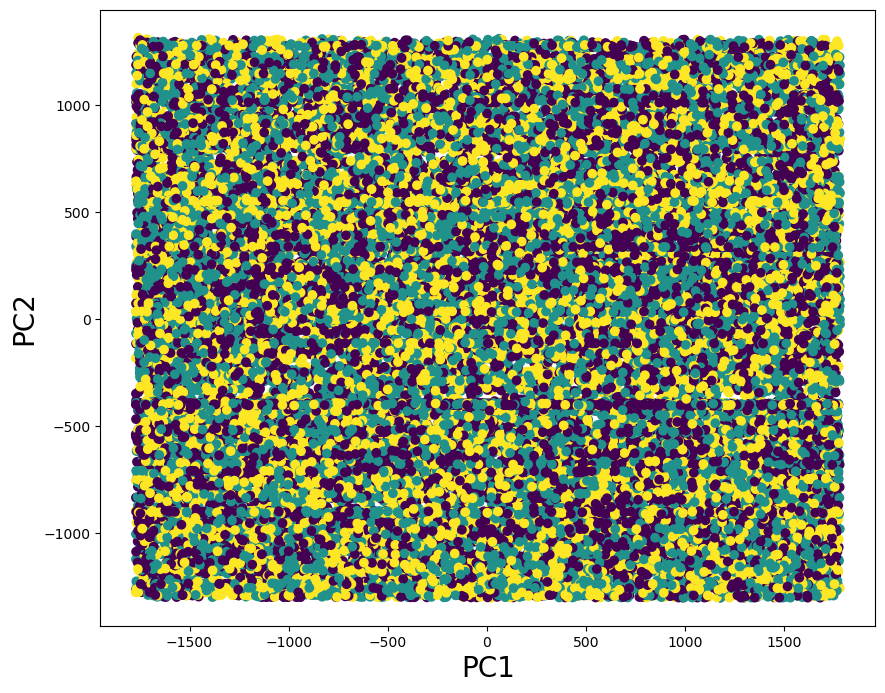

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
Z = pca.transform(X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
#ax.view_init(20, 20)
ax.scatter(Z.T[0], Z.T[1], c=y) # , Z.T[2]
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
#ax.set_zlabel('PC3', fontsize=20)

Text(0.5, 0, 'PC3')

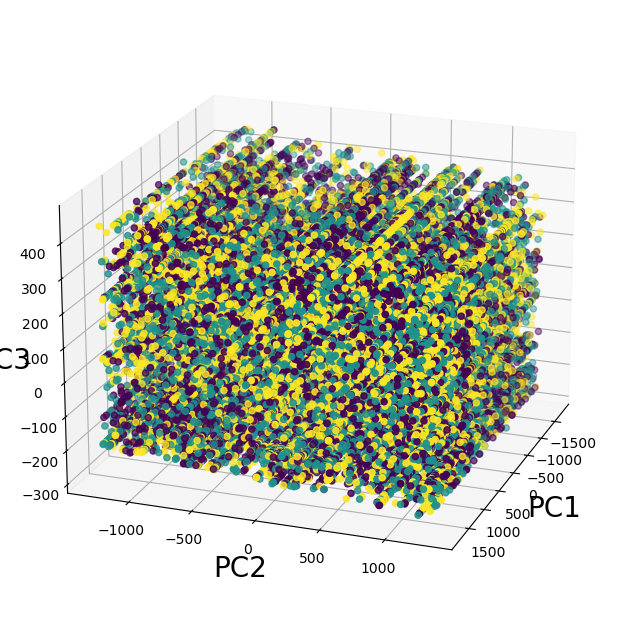

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
Z = pca.transform(X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y) # 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
# 0_0 кубик

По всем двум графикам видим очень плотное распределение всех трёх наших получившихся групп, из этого может следовать, что такие простые модели как knn и SGD по линейной регрессии не смогут в должной мере справится с задачей

Для того чтобы убедится в этом обучим наши модели и потом сравним их с остальными

### Стандартизация

Для начала работы с моделями машинного обучения стандартизуем данные

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(np.array(X['usefulCount']).reshape(-1, 1))
X['usefulCount'] = scaler.transform(np.array(X['usefulCount']).reshape(-1, 1))

### KNN

для нашей модели Knn(Метод k ближайших соседей) мы также осуществим некоторый подбор параметра n_neighbors для лучших метрик

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
Knn = KNeighborsClassifier()
Knn_grid = {'n_neighbors': np.array(np.linspace(1,15,15).round(),dtype = 'int')}
gs = GridSearchCV(Knn,Knn_grid,cv = 5,n_jobs = -1)
gs.fit(X_train,y_train)
print(gs.best_params_,gs.best_score_)

{'n_neighbors': 2} 0.38564253141076527


In [67]:
from sklearn.metrics import classification_report
Knn = KNeighborsClassifier(n_neighbors = 2)
Knn.fit(X_train,y_train)
print(classification_report(y_test, Knn.predict(X_test)))

              precision    recall  f1-score   support

           1       0.40      0.64      0.49      5880
           2       0.35      0.33      0.34      5473
           3       0.38      0.13      0.19      4949

    accuracy                           0.38     16302
   macro avg       0.38      0.37      0.34     16302
weighted avg       0.38      0.38      0.35     16302



### SGDClassifier

In [68]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.45      0.36      0.40      5880
           2       0.42      0.00      0.01      5473
           3       0.33      0.76      0.46      4949

    accuracy                           0.36     16302
   macro avg       0.40      0.37      0.29     16302
weighted avg       0.40      0.36      0.28     16302



Как можем увидеть по взвешенным метрикам accuracy, macro avg, weighted avg результат в 0.30-0.40 точности модели - не самый лучший результат, он приближён к прогнозированию наугад

Для начала реализуя наши алгоритмы остановимся на наивных методах Байеса, ведь говоря о плюсах: он хорошо работает с категориальными признаками и производительность наивного байесовского классификатора лучше, чем у других простых алгоритмов

Используем несколько итераций методов(которые могут принимать отрицательные значения в признаках):

### BernoulliNB

In [71]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.55      0.62      0.58      5880
           2       0.47      0.48      0.47      5473
           3       0.49      0.41      0.45      4949

    accuracy                           0.51     16302
   macro avg       0.50      0.50      0.50     16302
weighted avg       0.51      0.51      0.50     16302



### GaussianNB

In [74]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.55      0.73      0.63      5880
           2       0.46      0.50      0.48      5473
           3       0.59      0.30      0.40      4949

    accuracy                           0.53     16302
   macro avg       0.53      0.51      0.50     16302
weighted avg       0.53      0.53      0.51     16302



Можно увидеть что модель GaussianNB(accuracy = 0.53) по точности получилась слегка лучше BernoulliNB(accuracy= 0.51), именно эту итерацию мы берём для дальшего исследования и подбора моделей

Повысим сложность нашего метода классификации, используем ансамблевый метод Catboost, реализующий леса по методам деревьев решений

In [80]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(eval_metric = "TotalF1", task_type="GPU")


model.fit(X_train, y_train,
         eval_set=(X_test, y_test),
          verbose=True
)
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_test), y_test))

Learning rate set to 0.149738
0:	learn: 0.4596686	test: 0.4474054	best: 0.4474054 (0)	total: 48.2ms	remaining: 48.1s
1:	learn: 0.4709048	test: 0.4616419	best: 0.4616419 (1)	total: 62.7ms	remaining: 31.3s
2:	learn: 0.4823383	test: 0.4709521	best: 0.4709521 (2)	total: 76.7ms	remaining: 25.5s
3:	learn: 0.4848439	test: 0.4728382	best: 0.4728382 (3)	total: 90.2ms	remaining: 22.5s
4:	learn: 0.4880228	test: 0.4808205	best: 0.4808205 (4)	total: 104ms	remaining: 20.7s
5:	learn: 0.4954721	test: 0.4850531	best: 0.4850531 (5)	total: 118ms	remaining: 19.5s
6:	learn: 0.4979274	test: 0.4894212	best: 0.4894212 (6)	total: 131ms	remaining: 18.6s
7:	learn: 0.5011143	test: 0.4908848	best: 0.4908848 (7)	total: 145ms	remaining: 18s
8:	learn: 0.5075461	test: 0.4921001	best: 0.4921001 (8)	total: 164ms	remaining: 18s
9:	learn: 0.5102479	test: 0.4957904	best: 0.4957904 (9)	total: 178ms	remaining: 17.6s
10:	learn: 0.5130918	test: 0.4977779	best: 0.4977779 (10)	total: 192ms	remaining: 17.2s
11:	learn: 0.5172104	t

108:	learn: 0.6468083	test: 0.5721266	best: 0.5728091 (107)	total: 1.42s	remaining: 11.6s
109:	learn: 0.6474519	test: 0.5728975	best: 0.5728975 (109)	total: 1.43s	remaining: 11.6s
110:	learn: 0.6486571	test: 0.5729183	best: 0.5729183 (110)	total: 1.45s	remaining: 11.6s
111:	learn: 0.6489234	test: 0.5727304	best: 0.5729183 (110)	total: 1.46s	remaining: 11.6s
112:	learn: 0.6498147	test: 0.5716016	best: 0.5729183 (110)	total: 1.48s	remaining: 11.6s
113:	learn: 0.6497527	test: 0.5719830	best: 0.5729183 (110)	total: 1.49s	remaining: 11.6s
114:	learn: 0.6504148	test: 0.5724138	best: 0.5729183 (110)	total: 1.5s	remaining: 11.5s
115:	learn: 0.6513735	test: 0.5733459	best: 0.5733459 (115)	total: 1.51s	remaining: 11.5s
116:	learn: 0.6516396	test: 0.5732035	best: 0.5733459 (115)	total: 1.52s	remaining: 11.5s
117:	learn: 0.6519830	test: 0.5719350	best: 0.5733459 (115)	total: 1.53s	remaining: 11.5s
118:	learn: 0.6529324	test: 0.5727764	best: 0.5733459 (115)	total: 1.55s	remaining: 11.5s
119:	learn:

213:	learn: 0.7094243	test: 0.5859437	best: 0.5859437 (213)	total: 2.7s	remaining: 9.91s
214:	learn: 0.7103194	test: 0.5858458	best: 0.5859437 (213)	total: 2.73s	remaining: 9.97s
215:	learn: 0.7103973	test: 0.5864100	best: 0.5864100 (215)	total: 2.74s	remaining: 9.96s
216:	learn: 0.7110580	test: 0.5867258	best: 0.5867258 (216)	total: 2.75s	remaining: 9.94s
217:	learn: 0.7118299	test: 0.5867998	best: 0.5867998 (217)	total: 2.77s	remaining: 9.92s
218:	learn: 0.7120743	test: 0.5867910	best: 0.5867998 (217)	total: 2.78s	remaining: 9.9s
219:	learn: 0.7128727	test: 0.5854861	best: 0.5867998 (217)	total: 2.79s	remaining: 9.89s
220:	learn: 0.7130794	test: 0.5862432	best: 0.5867998 (217)	total: 2.8s	remaining: 9.87s
221:	learn: 0.7130004	test: 0.5856039	best: 0.5867998 (217)	total: 2.81s	remaining: 9.85s
222:	learn: 0.7140586	test: 0.5863479	best: 0.5867998 (217)	total: 2.82s	remaining: 9.84s
223:	learn: 0.7139229	test: 0.5856137	best: 0.5867998 (217)	total: 2.83s	remaining: 9.82s
224:	learn: 0

318:	learn: 0.7572448	test: 0.5956594	best: 0.5956594 (318)	total: 4.02s	remaining: 8.57s
319:	learn: 0.7572366	test: 0.5954693	best: 0.5956594 (318)	total: 4.03s	remaining: 8.56s
320:	learn: 0.7566146	test: 0.5958905	best: 0.5958905 (320)	total: 4.04s	remaining: 8.55s
321:	learn: 0.7573497	test: 0.5959393	best: 0.5959393 (321)	total: 4.05s	remaining: 8.53s
322:	learn: 0.7577818	test: 0.5965023	best: 0.5965023 (322)	total: 4.06s	remaining: 8.51s
323:	learn: 0.7582892	test: 0.5966003	best: 0.5966003 (323)	total: 4.07s	remaining: 8.5s
324:	learn: 0.7589039	test: 0.5970435	best: 0.5970435 (324)	total: 4.08s	remaining: 8.48s
325:	learn: 0.7593250	test: 0.5963911	best: 0.5970435 (324)	total: 4.09s	remaining: 8.47s
326:	learn: 0.7603334	test: 0.5972338	best: 0.5972338 (326)	total: 4.11s	remaining: 8.45s
327:	learn: 0.7604712	test: 0.5960547	best: 0.5972338 (326)	total: 4.12s	remaining: 8.44s
328:	learn: 0.7608091	test: 0.5954328	best: 0.5972338 (326)	total: 4.13s	remaining: 8.43s
329:	learn:

417:	learn: 0.7942878	test: 0.6004802	best: 0.6011324 (398)	total: 5.28s	remaining: 7.35s
418:	learn: 0.7945309	test: 0.6007439	best: 0.6011324 (398)	total: 5.29s	remaining: 7.34s
419:	learn: 0.7948526	test: 0.6011099	best: 0.6011324 (398)	total: 5.31s	remaining: 7.34s
420:	learn: 0.7953898	test: 0.6010804	best: 0.6011324 (398)	total: 5.33s	remaining: 7.33s
421:	learn: 0.7962215	test: 0.6009470	best: 0.6011324 (398)	total: 5.34s	remaining: 7.31s
422:	learn: 0.7967808	test: 0.6012038	best: 0.6012038 (422)	total: 5.35s	remaining: 7.3s
423:	learn: 0.7969696	test: 0.6018245	best: 0.6018245 (423)	total: 5.37s	remaining: 7.29s
424:	learn: 0.7970288	test: 0.6000012	best: 0.6018245 (423)	total: 5.38s	remaining: 7.28s
425:	learn: 0.7977302	test: 0.6001820	best: 0.6018245 (423)	total: 5.39s	remaining: 7.27s
426:	learn: 0.7983463	test: 0.6008000	best: 0.6018245 (423)	total: 5.41s	remaining: 7.25s
427:	learn: 0.7984494	test: 0.5999872	best: 0.6018245 (423)	total: 5.42s	remaining: 7.24s
428:	learn:

519:	learn: 0.8284347	test: 0.6086632	best: 0.6086632 (519)	total: 6.56s	remaining: 6.05s
520:	learn: 0.8285323	test: 0.6087082	best: 0.6087082 (520)	total: 6.57s	remaining: 6.04s
521:	learn: 0.8287502	test: 0.6084205	best: 0.6087082 (520)	total: 6.58s	remaining: 6.03s
522:	learn: 0.8292024	test: 0.6087234	best: 0.6087234 (522)	total: 6.6s	remaining: 6.02s
523:	learn: 0.8292648	test: 0.6081220	best: 0.6087234 (522)	total: 6.61s	remaining: 6s
524:	learn: 0.8293029	test: 0.6079467	best: 0.6087234 (522)	total: 6.62s	remaining: 5.99s
525:	learn: 0.8297229	test: 0.6081442	best: 0.6087234 (522)	total: 6.63s	remaining: 5.98s
526:	learn: 0.8300605	test: 0.6087417	best: 0.6087417 (526)	total: 6.64s	remaining: 5.96s
527:	learn: 0.8297350	test: 0.6089128	best: 0.6089128 (527)	total: 6.65s	remaining: 5.95s
528:	learn: 0.8301311	test: 0.6077244	best: 0.6089128 (527)	total: 6.67s	remaining: 5.93s
529:	learn: 0.8301004	test: 0.6083996	best: 0.6089128 (527)	total: 6.67s	remaining: 5.92s
530:	learn: 0.

626:	learn: 0.8595312	test: 0.6127300	best: 0.6133538 (624)	total: 7.84s	remaining: 4.67s
627:	learn: 0.8592884	test: 0.6129161	best: 0.6133538 (624)	total: 7.86s	remaining: 4.65s
628:	learn: 0.8594673	test: 0.6131347	best: 0.6133538 (624)	total: 7.87s	remaining: 4.64s
629:	learn: 0.8598074	test: 0.6127029	best: 0.6133538 (624)	total: 7.88s	remaining: 4.63s
630:	learn: 0.8601390	test: 0.6132548	best: 0.6133538 (624)	total: 7.89s	remaining: 4.62s
631:	learn: 0.8603807	test: 0.6130294	best: 0.6133538 (624)	total: 7.91s	remaining: 4.6s
632:	learn: 0.8605907	test: 0.6137813	best: 0.6137813 (632)	total: 7.92s	remaining: 4.59s
633:	learn: 0.8606178	test: 0.6145107	best: 0.6145107 (633)	total: 7.93s	remaining: 4.58s
634:	learn: 0.8608649	test: 0.6138928	best: 0.6145107 (633)	total: 7.94s	remaining: 4.56s
635:	learn: 0.8612235	test: 0.6137229	best: 0.6145107 (633)	total: 7.95s	remaining: 4.55s
636:	learn: 0.8616540	test: 0.6136428	best: 0.6145107 (633)	total: 7.96s	remaining: 4.54s
637:	learn:

727:	learn: 0.8824853	test: 0.6183828	best: 0.6193753 (723)	total: 9.12s	remaining: 3.41s
728:	learn: 0.8827882	test: 0.6187590	best: 0.6193753 (723)	total: 9.13s	remaining: 3.4s
729:	learn: 0.8829696	test: 0.6186254	best: 0.6193753 (723)	total: 9.15s	remaining: 3.38s
730:	learn: 0.8831187	test: 0.6188411	best: 0.6193753 (723)	total: 9.16s	remaining: 3.37s
731:	learn: 0.8833604	test: 0.6188460	best: 0.6193753 (723)	total: 9.17s	remaining: 3.36s
732:	learn: 0.8837841	test: 0.6194449	best: 0.6194449 (732)	total: 9.19s	remaining: 3.35s
733:	learn: 0.8837540	test: 0.6192327	best: 0.6194449 (732)	total: 9.2s	remaining: 3.33s
734:	learn: 0.8840907	test: 0.6190702	best: 0.6194449 (732)	total: 9.21s	remaining: 3.32s
735:	learn: 0.8842775	test: 0.6194721	best: 0.6194721 (735)	total: 9.23s	remaining: 3.31s
736:	learn: 0.8843103	test: 0.6193805	best: 0.6194721 (735)	total: 9.24s	remaining: 3.3s
737:	learn: 0.8844289	test: 0.6188142	best: 0.6194721 (735)	total: 9.25s	remaining: 3.28s
738:	learn: 0

822:	learn: 0.9014420	test: 0.6199103	best: 0.6202538 (817)	total: 10.4s	remaining: 2.23s
823:	learn: 0.9012601	test: 0.6195768	best: 0.6202538 (817)	total: 10.4s	remaining: 2.22s
824:	learn: 0.9014743	test: 0.6196250	best: 0.6202538 (817)	total: 10.4s	remaining: 2.21s
825:	learn: 0.9016537	test: 0.6194976	best: 0.6202538 (817)	total: 10.4s	remaining: 2.2s
826:	learn: 0.9018371	test: 0.6198962	best: 0.6202538 (817)	total: 10.4s	remaining: 2.18s
827:	learn: 0.9019572	test: 0.6197216	best: 0.6202538 (817)	total: 10.5s	remaining: 2.17s
828:	learn: 0.9021995	test: 0.6194977	best: 0.6202538 (817)	total: 10.5s	remaining: 2.16s
829:	learn: 0.9025911	test: 0.6194573	best: 0.6202538 (817)	total: 10.5s	remaining: 2.14s
830:	learn: 0.9028645	test: 0.6202735	best: 0.6202735 (830)	total: 10.5s	remaining: 2.13s
831:	learn: 0.9032325	test: 0.6194019	best: 0.6202735 (830)	total: 10.5s	remaining: 2.12s
832:	learn: 0.9033223	test: 0.6195756	best: 0.6202735 (830)	total: 10.5s	remaining: 2.11s
833:	learn:

924:	learn: 0.9210578	test: 0.6215947	best: 0.6215947 (924)	total: 11.6s	remaining: 945ms
925:	learn: 0.9211796	test: 0.6206569	best: 0.6215947 (924)	total: 11.7s	remaining: 932ms
926:	learn: 0.9215105	test: 0.6209160	best: 0.6215947 (924)	total: 11.7s	remaining: 919ms
927:	learn: 0.9217229	test: 0.6221220	best: 0.6221220 (927)	total: 11.7s	remaining: 907ms
928:	learn: 0.9217551	test: 0.6215981	best: 0.6221220 (927)	total: 11.7s	remaining: 894ms
929:	learn: 0.9218480	test: 0.6204495	best: 0.6221220 (927)	total: 11.7s	remaining: 882ms
930:	learn: 0.9223602	test: 0.6213772	best: 0.6221220 (927)	total: 11.7s	remaining: 869ms
931:	learn: 0.9225403	test: 0.6215648	best: 0.6221220 (927)	total: 11.7s	remaining: 856ms
932:	learn: 0.9227205	test: 0.6216863	best: 0.6221220 (927)	total: 11.7s	remaining: 844ms
933:	learn: 0.9225124	test: 0.6213356	best: 0.6221220 (927)	total: 11.8s	remaining: 831ms
934:	learn: 0.9227840	test: 0.6217302	best: 0.6221220 (927)	total: 11.8s	remaining: 818ms
935:	learn

По сравнению с предыдущими рассмотренными моделями решение Catboost показало себя намного лучше, взвешенные метрики в среднем остановились на 0.62-0.63

Мы нашли на данный момент лучшую модель для нашей классификации и для улучшения точности наших прогнозов проведём поиск наилучших параметров модели встроенным методом gridsearch

In [85]:
model = CatBoostClassifier(verbose=False)

grid = {'learning_rate': [ 0.1,0.2,0.3], 
        'depth': [3,5], 
        'l2_leaf_reg': [1,2,3],
        'iterations':[500,800,900,1000],
        "max_leaves": [31,40,50],
        }

grid_search_result = model.grid_search(grid,
                                       X=X,
                                       y=y,
                                       train_size = 0.7,shuffle = True,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.898013186
bestIteration = 499

0:	loss: 0.8980132	best: 0.8980132 (0)	total: 12.4s	remaining: 44m 24s

bestTest = 0.8807338652
bestIteration = 498

1:	loss: 0.8807339	best: 0.8807339 (1)	total: 24.3s	remaining: 43m 14s

bestTest = 0.8784756721
bestIteration = 494

2:	loss: 0.8784757	best: 0.8784757 (2)	total: 36s	remaining: 42m 35s

bestTest = 0.8985557225
bestIteration = 499

3:	loss: 0.8985557	best: 0.8784757 (2)	total: 48.3s	remaining: 42m 41s

bestTest = 0.8812342108
bestIteration = 499

4:	loss: 0.8812342	best: 0.8784757 (2)	total: 1m	remaining: 42m 47s

bestTest = 0.8778763008
bestIteration = 497

5:	loss: 0.8778763	best: 0.8778763 (5)	total: 1m 13s	remaining: 42m 40s

bestTest = 0.8982425869
bestIteration = 499

6:	loss: 0.8982426	best: 0.8778763 (5)	total: 1m 27s	remaining: 43m 26s

bestTest = 0.8810607995
bestIteration = 499

7:	loss: 0.8810608	best: 0.8778763 (5)	total: 1m 42s	remaining: 44m 26s

bestTest = 0.8763869268
bestIteration = 491

8:	loss: 0.8763869	be

KeyboardInterrupt: 

In [95]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(depth=10,l2_leaf_reg=2,learning_rate=0.4,iterations= 1200,eval_metric='TotalF1',task_type="GPU")


model.fit(X_train, y_train,
         eval_set=(X_test, y_test),
          verbose=True
)
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_test), y_test))

0:	learn: 0.5092374	test: 0.4623287	best: 0.4623287 (0)	total: 100ms	remaining: 2m
1:	learn: 0.5434127	test: 0.4826530	best: 0.4826530 (1)	total: 190ms	remaining: 1m 53s
2:	learn: 0.5733872	test: 0.4962331	best: 0.4962331 (2)	total: 269ms	remaining: 1m 47s
3:	learn: 0.5894726	test: 0.5039088	best: 0.5039088 (3)	total: 346ms	remaining: 1m 43s
4:	learn: 0.6077168	test: 0.5116430	best: 0.5116430 (4)	total: 426ms	remaining: 1m 41s
5:	learn: 0.6180900	test: 0.5174039	best: 0.5174039 (5)	total: 500ms	remaining: 1m 39s
6:	learn: 0.6321391	test: 0.5248267	best: 0.5248267 (6)	total: 578ms	remaining: 1m 38s
7:	learn: 0.6429627	test: 0.5260139	best: 0.5260139 (7)	total: 650ms	remaining: 1m 36s
8:	learn: 0.6596461	test: 0.5321426	best: 0.5321426 (8)	total: 728ms	remaining: 1m 36s
9:	learn: 0.6702296	test: 0.5365152	best: 0.5365152 (9)	total: 814ms	remaining: 1m 36s
10:	learn: 0.6790286	test: 0.5405943	best: 0.5405943 (10)	total: 894ms	remaining: 1m 36s
11:	learn: 0.6901744	test: 0.5412905	best: 0.

95:	learn: 0.9771249	test: 0.5940532	best: 0.5940532 (95)	total: 7.29s	remaining: 1m 23s
96:	learn: 0.9787570	test: 0.5934917	best: 0.5940532 (95)	total: 7.37s	remaining: 1m 23s
97:	learn: 0.9796637	test: 0.5933365	best: 0.5940532 (95)	total: 7.44s	remaining: 1m 23s
98:	learn: 0.9803591	test: 0.5932703	best: 0.5940532 (95)	total: 7.52s	remaining: 1m 23s
99:	learn: 0.9812951	test: 0.5943029	best: 0.5943029 (99)	total: 7.59s	remaining: 1m 23s
100:	learn: 0.9825957	test: 0.5929508	best: 0.5943029 (99)	total: 7.68s	remaining: 1m 23s
101:	learn: 0.9827469	test: 0.5929083	best: 0.5943029 (99)	total: 7.76s	remaining: 1m 23s
102:	learn: 0.9836541	test: 0.5924214	best: 0.5943029 (99)	total: 7.84s	remaining: 1m 23s
103:	learn: 0.9843789	test: 0.5929457	best: 0.5943029 (99)	total: 7.91s	remaining: 1m 23s
104:	learn: 0.9850134	test: 0.5933419	best: 0.5943029 (99)	total: 7.99s	remaining: 1m 23s
105:	learn: 0.9859804	test: 0.5937691	best: 0.5943029 (99)	total: 8.06s	remaining: 1m 23s
106:	learn: 0.9

189:	learn: 0.9999094	test: 0.6012699	best: 0.6022117 (150)	total: 14.9s	remaining: 1m 19s
190:	learn: 0.9999396	test: 0.6014614	best: 0.6022117 (150)	total: 14.9s	remaining: 1m 18s
191:	learn: 0.9999396	test: 0.6014846	best: 0.6022117 (150)	total: 15s	remaining: 1m 18s
192:	learn: 0.9999396	test: 0.6014299	best: 0.6022117 (150)	total: 15.1s	remaining: 1m 18s
193:	learn: 0.9999698	test: 0.6010521	best: 0.6022117 (150)	total: 15.2s	remaining: 1m 18s
194:	learn: 0.9999698	test: 0.6005509	best: 0.6022117 (150)	total: 15.2s	remaining: 1m 18s
195:	learn: 0.9999396	test: 0.6017372	best: 0.6022117 (150)	total: 15.3s	remaining: 1m 18s
196:	learn: 0.9999396	test: 0.6028470	best: 0.6028470 (196)	total: 15.4s	remaining: 1m 18s
197:	learn: 0.9999396	test: 0.6014008	best: 0.6028470 (196)	total: 15.5s	remaining: 1m 18s
198:	learn: 0.9999396	test: 0.6018032	best: 0.6028470 (196)	total: 15.5s	remaining: 1m 18s
199:	learn: 0.9999396	test: 0.6033104	best: 0.6033104 (199)	total: 15.6s	remaining: 1m 17s
2

282:	learn: 1.0000000	test: 0.6037648	best: 0.6040753 (280)	total: 21.9s	remaining: 1m 10s
283:	learn: 0.9999698	test: 0.6040403	best: 0.6040753 (280)	total: 21.9s	remaining: 1m 10s
284:	learn: 1.0000000	test: 0.6036661	best: 0.6040753 (280)	total: 22s	remaining: 1m 10s
285:	learn: 1.0000000	test: 0.6042153	best: 0.6042153 (285)	total: 22.1s	remaining: 1m 10s
286:	learn: 1.0000000	test: 0.6036735	best: 0.6042153 (285)	total: 22.2s	remaining: 1m 10s
287:	learn: 1.0000000	test: 0.6034187	best: 0.6042153 (285)	total: 22.2s	remaining: 1m 10s
288:	learn: 1.0000000	test: 0.6034659	best: 0.6042153 (285)	total: 22.3s	remaining: 1m 10s
289:	learn: 1.0000000	test: 0.6026007	best: 0.6042153 (285)	total: 22.4s	remaining: 1m 10s
290:	learn: 1.0000000	test: 0.6037407	best: 0.6042153 (285)	total: 22.5s	remaining: 1m 10s
291:	learn: 1.0000000	test: 0.6044939	best: 0.6044939 (291)	total: 22.5s	remaining: 1m 10s
292:	learn: 1.0000000	test: 0.6042169	best: 0.6044939 (291)	total: 22.6s	remaining: 1m 9s
29

376:	learn: 1.0000000	test: 0.6043175	best: 0.6063760 (342)	total: 28.9s	remaining: 1m 3s
377:	learn: 1.0000000	test: 0.6056750	best: 0.6063760 (342)	total: 28.9s	remaining: 1m 2s
378:	learn: 1.0000000	test: 0.6058388	best: 0.6063760 (342)	total: 29s	remaining: 1m 2s
379:	learn: 1.0000000	test: 0.6051675	best: 0.6063760 (342)	total: 29.1s	remaining: 1m 2s
380:	learn: 1.0000000	test: 0.6045762	best: 0.6063760 (342)	total: 29.1s	remaining: 1m 2s
381:	learn: 1.0000000	test: 0.6043957	best: 0.6063760 (342)	total: 29.2s	remaining: 1m 2s
382:	learn: 1.0000000	test: 0.6046107	best: 0.6063760 (342)	total: 29.3s	remaining: 1m 2s
383:	learn: 1.0000000	test: 0.6052125	best: 0.6063760 (342)	total: 29.4s	remaining: 1m 2s
384:	learn: 1.0000000	test: 0.6054109	best: 0.6063760 (342)	total: 29.4s	remaining: 1m 2s
385:	learn: 1.0000000	test: 0.6048395	best: 0.6063760 (342)	total: 29.5s	remaining: 1m 2s
386:	learn: 1.0000000	test: 0.6057568	best: 0.6063760 (342)	total: 29.6s	remaining: 1m 2s
387:	learn: 

469:	learn: 1.0000000	test: 0.6072428	best: 0.6085412 (450)	total: 35.7s	remaining: 55.5s
470:	learn: 1.0000000	test: 0.6069827	best: 0.6085412 (450)	total: 35.8s	remaining: 55.4s
471:	learn: 1.0000000	test: 0.6076156	best: 0.6085412 (450)	total: 35.9s	remaining: 55.3s
472:	learn: 1.0000000	test: 0.6083143	best: 0.6085412 (450)	total: 35.9s	remaining: 55.2s
473:	learn: 1.0000000	test: 0.6078589	best: 0.6085412 (450)	total: 36s	remaining: 55.1s
474:	learn: 1.0000000	test: 0.6076507	best: 0.6085412 (450)	total: 36.1s	remaining: 55s
475:	learn: 1.0000000	test: 0.6073873	best: 0.6085412 (450)	total: 36.1s	remaining: 54.9s
476:	learn: 1.0000000	test: 0.6074590	best: 0.6085412 (450)	total: 36.2s	remaining: 54.9s
477:	learn: 1.0000000	test: 0.6073742	best: 0.6085412 (450)	total: 36.3s	remaining: 54.8s
478:	learn: 1.0000000	test: 0.6078720	best: 0.6085412 (450)	total: 36.4s	remaining: 54.7s
479:	learn: 1.0000000	test: 0.6074619	best: 0.6085412 (450)	total: 36.4s	remaining: 54.6s
480:	learn: 1.

561:	learn: 1.0000000	test: 0.6099250	best: 0.6102106 (556)	total: 42.5s	remaining: 48.2s
562:	learn: 1.0000000	test: 0.6101023	best: 0.6102106 (556)	total: 42.6s	remaining: 48.2s
563:	learn: 1.0000000	test: 0.6102231	best: 0.6102231 (563)	total: 42.6s	remaining: 48.1s
564:	learn: 1.0000000	test: 0.6104215	best: 0.6104215 (564)	total: 42.7s	remaining: 48s
565:	learn: 1.0000000	test: 0.6104896	best: 0.6104896 (565)	total: 42.8s	remaining: 47.9s
566:	learn: 1.0000000	test: 0.6096089	best: 0.6104896 (565)	total: 42.8s	remaining: 47.8s
567:	learn: 1.0000000	test: 0.6095578	best: 0.6104896 (565)	total: 42.9s	remaining: 47.7s
568:	learn: 1.0000000	test: 0.6091895	best: 0.6104896 (565)	total: 43s	remaining: 47.7s
569:	learn: 1.0000000	test: 0.6095698	best: 0.6104896 (565)	total: 43.1s	remaining: 47.6s
570:	learn: 1.0000000	test: 0.6094222	best: 0.6104896 (565)	total: 43.1s	remaining: 47.5s
571:	learn: 1.0000000	test: 0.6098943	best: 0.6104896 (565)	total: 43.2s	remaining: 47.4s
572:	learn: 1.

655:	learn: 1.0000000	test: 0.6110644	best: 0.6110644 (655)	total: 49.3s	remaining: 40.9s
656:	learn: 1.0000000	test: 0.6106932	best: 0.6110644 (655)	total: 49.4s	remaining: 40.8s
657:	learn: 1.0000000	test: 0.6109564	best: 0.6110644 (655)	total: 49.4s	remaining: 40.7s
658:	learn: 1.0000000	test: 0.6105473	best: 0.6110644 (655)	total: 49.5s	remaining: 40.6s
659:	learn: 1.0000000	test: 0.6108446	best: 0.6110644 (655)	total: 49.6s	remaining: 40.6s
660:	learn: 1.0000000	test: 0.6107992	best: 0.6110644 (655)	total: 49.6s	remaining: 40.5s
661:	learn: 1.0000000	test: 0.6108455	best: 0.6110644 (655)	total: 49.7s	remaining: 40.4s
662:	learn: 1.0000000	test: 0.6110776	best: 0.6110776 (662)	total: 49.8s	remaining: 40.3s
663:	learn: 1.0000000	test: 0.6110542	best: 0.6110776 (662)	total: 49.8s	remaining: 40.2s
664:	learn: 1.0000000	test: 0.6109169	best: 0.6110776 (662)	total: 49.9s	remaining: 40.2s
665:	learn: 1.0000000	test: 0.6111133	best: 0.6111133 (665)	total: 50s	remaining: 40.1s
666:	learn: 

748:	learn: 1.0000000	test: 0.6114535	best: 0.6130835 (711)	total: 55.9s	remaining: 33.7s
749:	learn: 1.0000000	test: 0.6116139	best: 0.6130835 (711)	total: 56s	remaining: 33.6s
750:	learn: 1.0000000	test: 0.6112896	best: 0.6130835 (711)	total: 56s	remaining: 33.5s
751:	learn: 1.0000000	test: 0.6108396	best: 0.6130835 (711)	total: 56.1s	remaining: 33.4s
752:	learn: 1.0000000	test: 0.6107963	best: 0.6130835 (711)	total: 56.2s	remaining: 33.4s
753:	learn: 1.0000000	test: 0.6108107	best: 0.6130835 (711)	total: 56.3s	remaining: 33.3s
754:	learn: 1.0000000	test: 0.6113100	best: 0.6130835 (711)	total: 56.3s	remaining: 33.2s
755:	learn: 1.0000000	test: 0.6116654	best: 0.6130835 (711)	total: 56.4s	remaining: 33.1s
756:	learn: 1.0000000	test: 0.6115792	best: 0.6130835 (711)	total: 56.5s	remaining: 33s
757:	learn: 1.0000000	test: 0.6116460	best: 0.6130835 (711)	total: 56.5s	remaining: 33s
758:	learn: 1.0000000	test: 0.6122651	best: 0.6130835 (711)	total: 56.6s	remaining: 32.9s
759:	learn: 1.0000

842:	learn: 1.0000000	test: 0.6126843	best: 0.6135007 (837)	total: 1m 2s	remaining: 26.7s
843:	learn: 1.0000000	test: 0.6126317	best: 0.6135007 (837)	total: 1m 3s	remaining: 26.6s
844:	learn: 1.0000000	test: 0.6120455	best: 0.6135007 (837)	total: 1m 3s	remaining: 26.5s
845:	learn: 1.0000000	test: 0.6123419	best: 0.6135007 (837)	total: 1m 3s	remaining: 26.4s
846:	learn: 1.0000000	test: 0.6124159	best: 0.6135007 (837)	total: 1m 3s	remaining: 26.3s
847:	learn: 1.0000000	test: 0.6125316	best: 0.6135007 (837)	total: 1m 3s	remaining: 26.3s
848:	learn: 1.0000000	test: 0.6125698	best: 0.6135007 (837)	total: 1m 3s	remaining: 26.2s
849:	learn: 1.0000000	test: 0.6130736	best: 0.6135007 (837)	total: 1m 3s	remaining: 26.1s
850:	learn: 1.0000000	test: 0.6127387	best: 0.6135007 (837)	total: 1m 3s	remaining: 26s
851:	learn: 1.0000000	test: 0.6127469	best: 0.6135007 (837)	total: 1m 3s	remaining: 26s
852:	learn: 1.0000000	test: 0.6122676	best: 0.6135007 (837)	total: 1m 3s	remaining: 25.9s
853:	learn: 1.

934:	learn: 1.0000000	test: 0.6139764	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.7s
935:	learn: 1.0000000	test: 0.6139357	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.6s
936:	learn: 1.0000000	test: 0.6134803	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.5s
937:	learn: 1.0000000	test: 0.6144129	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.5s
938:	learn: 1.0000000	test: 0.6139187	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.4s
939:	learn: 1.0000000	test: 0.6139315	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.3s
940:	learn: 1.0000000	test: 0.6140252	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.2s
941:	learn: 1.0000000	test: 0.6140145	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.1s
942:	learn: 1.0000000	test: 0.6139187	best: 0.6148080 (926)	total: 1m 9s	remaining: 19.1s
943:	learn: 1.0000000	test: 0.6146115	best: 0.6148080 (926)	total: 1m 10s	remaining: 19s
944:	learn: 1.0000000	test: 0.6140796	best: 0.6148080 (926)	total: 1m 10s	remaining: 18.9s
945:	learn

1026:	learn: 1.0000000	test: 0.6158942	best: 0.6160841 (1018)	total: 1m 15s	remaining: 12.8s
1027:	learn: 1.0000000	test: 0.6157443	best: 0.6160841 (1018)	total: 1m 15s	remaining: 12.7s
1028:	learn: 1.0000000	test: 0.6152995	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.6s
1029:	learn: 1.0000000	test: 0.6153419	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.6s
1030:	learn: 1.0000000	test: 0.6153594	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.5s
1031:	learn: 1.0000000	test: 0.6150008	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.4s
1032:	learn: 1.0000000	test: 0.6152463	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.3s
1033:	learn: 1.0000000	test: 0.6152144	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.3s
1034:	learn: 1.0000000	test: 0.6151649	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.2s
1035:	learn: 1.0000000	test: 0.6156067	best: 0.6160841 (1018)	total: 1m 16s	remaining: 12.1s
1036:	learn: 1.0000000	test: 0.6154666	best: 0.6160841 (1018)	total: 1

1115:	learn: 1.0000000	test: 0.6160421	best: 0.6165227 (1107)	total: 1m 22s	remaining: 6.2s
1116:	learn: 1.0000000	test: 0.6159760	best: 0.6165227 (1107)	total: 1m 22s	remaining: 6.12s
1117:	learn: 1.0000000	test: 0.6164705	best: 0.6165227 (1107)	total: 1m 22s	remaining: 6.05s
1118:	learn: 1.0000000	test: 0.6161341	best: 0.6165227 (1107)	total: 1m 22s	remaining: 5.97s
1119:	learn: 1.0000000	test: 0.6160854	best: 0.6165227 (1107)	total: 1m 22s	remaining: 5.9s
1120:	learn: 1.0000000	test: 0.6160956	best: 0.6165227 (1107)	total: 1m 22s	remaining: 5.82s
1121:	learn: 1.0000000	test: 0.6161230	best: 0.6165227 (1107)	total: 1m 22s	remaining: 5.75s
1122:	learn: 1.0000000	test: 0.6162342	best: 0.6165227 (1107)	total: 1m 22s	remaining: 5.68s
1123:	learn: 1.0000000	test: 0.6166121	best: 0.6166121 (1123)	total: 1m 22s	remaining: 5.6s
1124:	learn: 1.0000000	test: 0.6161091	best: 0.6166121 (1123)	total: 1m 22s	remaining: 5.53s
1125:	learn: 1.0000000	test: 0.6159374	best: 0.6166121 (1123)	total: 1m 2

В результате подбора наших параметров модель переобучилась и F1 score - метрика использующаяся при обучении стала = 1 - идеальное предсказание на тестовых данных

Чтобы избежать этого попробуем подругому разделить наши данные на выборки

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

In [113]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(depth=5,l2_leaf_reg=20,learning_rate=0.3,iterations= 1200,task_type="GPU",eval_metric='TotalF1')


model.fit(X_train, y_train,
         eval_set=(X_test, y_test),
          verbose=True
)
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_test), y_test))

0:	learn: 0.4517477	test: 0.4505700	best: 0.4505700 (0)	total: 27.5ms	remaining: 33s
1:	learn: 0.4680773	test: 0.4663107	best: 0.4663107 (1)	total: 46.6ms	remaining: 27.9s
2:	learn: 0.4781571	test: 0.4760872	best: 0.4760872 (2)	total: 69.3ms	remaining: 27.7s
3:	learn: 0.4823571	test: 0.4864505	best: 0.4864505 (3)	total: 97.8ms	remaining: 29.3s
4:	learn: 0.4870133	test: 0.4872813	best: 0.4872813 (4)	total: 243ms	remaining: 58s
5:	learn: 0.4956520	test: 0.4947097	best: 0.4947097 (5)	total: 1.75s	remaining: 5m 47s
6:	learn: 0.4998190	test: 0.4948512	best: 0.4948512 (6)	total: 1.88s	remaining: 5m 20s
7:	learn: 0.5053077	test: 0.4996938	best: 0.4996938 (7)	total: 2.01s	remaining: 4m 59s
8:	learn: 0.5140563	test: 0.5107354	best: 0.5107354 (8)	total: 2.65s	remaining: 5m 50s
9:	learn: 0.5170963	test: 0.5113022	best: 0.5113022 (9)	total: 2.81s	remaining: 5m 35s
10:	learn: 0.5203134	test: 0.5173884	best: 0.5173884 (10)	total: 2.92s	remaining: 5m 15s
11:	learn: 0.5242531	test: 0.5196145	best: 0.5

93:	learn: 0.6238703	test: 0.5735123	best: 0.5735123 (93)	total: 14.4s	remaining: 2m 49s
94:	learn: 0.6246504	test: 0.5742185	best: 0.5742185 (94)	total: 14.5s	remaining: 2m 48s
95:	learn: 0.6246933	test: 0.5748983	best: 0.5748983 (95)	total: 14.6s	remaining: 2m 47s
96:	learn: 0.6254153	test: 0.5752662	best: 0.5752662 (96)	total: 14.6s	remaining: 2m 46s
97:	learn: 0.6261927	test: 0.5724108	best: 0.5752662 (96)	total: 14.7s	remaining: 2m 45s
98:	learn: 0.6276538	test: 0.5717939	best: 0.5752662 (96)	total: 14.8s	remaining: 2m 44s
99:	learn: 0.6278368	test: 0.5733580	best: 0.5752662 (96)	total: 14.9s	remaining: 2m 44s
100:	learn: 0.6278314	test: 0.5745517	best: 0.5752662 (96)	total: 15s	remaining: 2m 43s
101:	learn: 0.6293981	test: 0.5743232	best: 0.5752662 (96)	total: 15.1s	remaining: 2m 42s
102:	learn: 0.6300309	test: 0.5741693	best: 0.5752662 (96)	total: 15.2s	remaining: 2m 41s
103:	learn: 0.6303354	test: 0.5729857	best: 0.5752662 (96)	total: 15.2s	remaining: 2m 40s
104:	learn: 0.63045

189:	learn: 0.6691938	test: 0.5831912	best: 0.5836823 (186)	total: 26.7s	remaining: 2m 21s
190:	learn: 0.6692740	test: 0.5826563	best: 0.5836823 (186)	total: 26.7s	remaining: 2m 21s
191:	learn: 0.6696179	test: 0.5838750	best: 0.5838750 (191)	total: 26.8s	remaining: 2m 20s
192:	learn: 0.6701540	test: 0.5827914	best: 0.5838750 (191)	total: 26.8s	remaining: 2m 19s
193:	learn: 0.6702303	test: 0.5832072	best: 0.5838750 (191)	total: 26.8s	remaining: 2m 19s
194:	learn: 0.6699337	test: 0.5830357	best: 0.5838750 (191)	total: 26.9s	remaining: 2m 18s
195:	learn: 0.6707551	test: 0.5827666	best: 0.5838750 (191)	total: 26.9s	remaining: 2m 17s
196:	learn: 0.6704206	test: 0.5824026	best: 0.5838750 (191)	total: 26.9s	remaining: 2m 17s
197:	learn: 0.6707078	test: 0.5817684	best: 0.5838750 (191)	total: 26.9s	remaining: 2m 16s
198:	learn: 0.6719495	test: 0.5840787	best: 0.5840787 (198)	total: 27s	remaining: 2m 15s
199:	learn: 0.6721938	test: 0.5842776	best: 0.5842776 (199)	total: 27s	remaining: 2m 14s
200

284:	learn: 0.7066065	test: 0.5876104	best: 0.5909721 (272)	total: 29.4s	remaining: 1m 34s
285:	learn: 0.7067847	test: 0.5868048	best: 0.5909721 (272)	total: 29.4s	remaining: 1m 33s
286:	learn: 0.7072669	test: 0.5888793	best: 0.5909721 (272)	total: 29.4s	remaining: 1m 33s
287:	learn: 0.7073269	test: 0.5894308	best: 0.5909721 (272)	total: 29.4s	remaining: 1m 33s
288:	learn: 0.7081187	test: 0.5895855	best: 0.5909721 (272)	total: 29.5s	remaining: 1m 32s
289:	learn: 0.7085167	test: 0.5901872	best: 0.5909721 (272)	total: 29.5s	remaining: 1m 32s
290:	learn: 0.7093555	test: 0.5891798	best: 0.5909721 (272)	total: 29.5s	remaining: 1m 32s
291:	learn: 0.7096021	test: 0.5890237	best: 0.5909721 (272)	total: 29.6s	remaining: 1m 32s
292:	learn: 0.7099063	test: 0.5885662	best: 0.5909721 (272)	total: 29.6s	remaining: 1m 31s
293:	learn: 0.7104095	test: 0.5888687	best: 0.5909721 (272)	total: 29.7s	remaining: 1m 31s
294:	learn: 0.7103976	test: 0.5898588	best: 0.5909721 (272)	total: 29.7s	remaining: 1m 31s

380:	learn: 0.7358832	test: 0.5910357	best: 0.5927371 (322)	total: 32s	remaining: 1m 8s
381:	learn: 0.7357744	test: 0.5904598	best: 0.5927371 (322)	total: 32s	remaining: 1m 8s
382:	learn: 0.7365116	test: 0.5903514	best: 0.5927371 (322)	total: 32.1s	remaining: 1m 8s
383:	learn: 0.7368453	test: 0.5909763	best: 0.5927371 (322)	total: 32.1s	remaining: 1m 8s
384:	learn: 0.7367780	test: 0.5910635	best: 0.5927371 (322)	total: 32.1s	remaining: 1m 7s
385:	learn: 0.7369715	test: 0.5903952	best: 0.5927371 (322)	total: 32.1s	remaining: 1m 7s
386:	learn: 0.7372811	test: 0.5902982	best: 0.5927371 (322)	total: 32.2s	remaining: 1m 7s
387:	learn: 0.7378661	test: 0.5900412	best: 0.5927371 (322)	total: 32.2s	remaining: 1m 7s
388:	learn: 0.7382535	test: 0.5895671	best: 0.5927371 (322)	total: 32.2s	remaining: 1m 7s
389:	learn: 0.7384638	test: 0.5899613	best: 0.5927371 (322)	total: 32.2s	remaining: 1m 6s
390:	learn: 0.7387967	test: 0.5890993	best: 0.5927371 (322)	total: 32.3s	remaining: 1m 6s
391:	learn: 0.

473:	learn: 0.7630600	test: 0.5975324	best: 0.5976299 (471)	total: 35s	remaining: 53.6s
474:	learn: 0.7632801	test: 0.5973739	best: 0.5976299 (471)	total: 36s	remaining: 54.9s
475:	learn: 0.7633545	test: 0.5970979	best: 0.5976299 (471)	total: 37.4s	remaining: 56.9s
476:	learn: 0.7640240	test: 0.5976680	best: 0.5976680 (476)	total: 38.7s	remaining: 58.7s
477:	learn: 0.7638586	test: 0.5978973	best: 0.5978973 (477)	total: 38.9s	remaining: 58.7s
478:	learn: 0.7647861	test: 0.5986691	best: 0.5986691 (478)	total: 39s	remaining: 58.6s
479:	learn: 0.7649773	test: 0.5987258	best: 0.5987258 (479)	total: 39s	remaining: 58.5s
480:	learn: 0.7653496	test: 0.5979256	best: 0.5987258 (479)	total: 39.1s	remaining: 58.4s
481:	learn: 0.7662417	test: 0.5981990	best: 0.5987258 (479)	total: 39.2s	remaining: 58.3s
482:	learn: 0.7661592	test: 0.5983456	best: 0.5987258 (479)	total: 39.3s	remaining: 58.3s
483:	learn: 0.7660103	test: 0.5985966	best: 0.5987258 (479)	total: 39.4s	remaining: 58.3s
484:	learn: 0.7665

572:	learn: 0.7894948	test: 0.6000064	best: 0.6006173 (511)	total: 49.9s	remaining: 54.6s
573:	learn: 0.7899618	test: 0.5992905	best: 0.6006173 (511)	total: 49.9s	remaining: 54.5s
574:	learn: 0.7902967	test: 0.5985531	best: 0.6006173 (511)	total: 50s	remaining: 54.3s
575:	learn: 0.7907093	test: 0.5989187	best: 0.6006173 (511)	total: 50s	remaining: 54.1s
576:	learn: 0.7911715	test: 0.5990259	best: 0.6006173 (511)	total: 50s	remaining: 54s
577:	learn: 0.7918272	test: 0.5991121	best: 0.6006173 (511)	total: 50s	remaining: 53.8s
578:	learn: 0.7914254	test: 0.5992207	best: 0.6006173 (511)	total: 50.1s	remaining: 53.7s
579:	learn: 0.7913896	test: 0.5986187	best: 0.6006173 (511)	total: 50.1s	remaining: 53.5s
580:	learn: 0.7917570	test: 0.5985995	best: 0.6006173 (511)	total: 50.1s	remaining: 53.4s
581:	learn: 0.7915191	test: 0.5972117	best: 0.6006173 (511)	total: 50.1s	remaining: 53.2s
582:	learn: 0.7914967	test: 0.5976421	best: 0.6006173 (511)	total: 50.2s	remaining: 53.1s
583:	learn: 0.791746

665:	learn: 0.8132654	test: 0.5999632	best: 0.6017473 (639)	total: 52.3s	remaining: 41.9s
666:	learn: 0.8134848	test: 0.6007207	best: 0.6017473 (639)	total: 52.4s	remaining: 41.8s
667:	learn: 0.8141883	test: 0.5996280	best: 0.6017473 (639)	total: 52.4s	remaining: 41.7s
668:	learn: 0.8144111	test: 0.6005347	best: 0.6017473 (639)	total: 52.4s	remaining: 41.6s
669:	learn: 0.8147933	test: 0.6006236	best: 0.6017473 (639)	total: 52.4s	remaining: 41.5s
670:	learn: 0.8153545	test: 0.6011708	best: 0.6017473 (639)	total: 52.5s	remaining: 41.4s
671:	learn: 0.8155086	test: 0.6004533	best: 0.6017473 (639)	total: 52.5s	remaining: 41.2s
672:	learn: 0.8156426	test: 0.6007835	best: 0.6017473 (639)	total: 52.5s	remaining: 41.1s
673:	learn: 0.8159405	test: 0.6010007	best: 0.6017473 (639)	total: 52.5s	remaining: 41s
674:	learn: 0.8159014	test: 0.6014735	best: 0.6017473 (639)	total: 52.6s	remaining: 40.9s
675:	learn: 0.8166146	test: 0.6032127	best: 0.6032127 (675)	total: 52.6s	remaining: 40.8s
676:	learn: 

763:	learn: 0.8368832	test: 0.6075481	best: 0.6075481 (763)	total: 54.9s	remaining: 31.3s
764:	learn: 0.8372898	test: 0.6073746	best: 0.6075481 (763)	total: 54.9s	remaining: 31.2s
765:	learn: 0.8378004	test: 0.6078287	best: 0.6078287 (765)	total: 55s	remaining: 31.1s
766:	learn: 0.8378796	test: 0.6081566	best: 0.6081566 (766)	total: 55s	remaining: 31s
767:	learn: 0.8380055	test: 0.6088836	best: 0.6088836 (767)	total: 55s	remaining: 30.9s
768:	learn: 0.8383390	test: 0.6083561	best: 0.6088836 (767)	total: 55s	remaining: 30.8s
769:	learn: 0.8386349	test: 0.6073177	best: 0.6088836 (767)	total: 55.1s	remaining: 30.7s
770:	learn: 0.8389237	test: 0.6078104	best: 0.6088836 (767)	total: 55.1s	remaining: 30.6s
771:	learn: 0.8392589	test: 0.6083039	best: 0.6088836 (767)	total: 55.1s	remaining: 30.6s
772:	learn: 0.8396074	test: 0.6080609	best: 0.6088836 (767)	total: 55.1s	remaining: 30.5s
773:	learn: 0.8398410	test: 0.6081872	best: 0.6088836 (767)	total: 55.2s	remaining: 30.4s
774:	learn: 0.839732

859:	learn: 0.8556880	test: 0.6052642	best: 0.6088836 (767)	total: 57.6s	remaining: 22.8s
860:	learn: 0.8559386	test: 0.6059108	best: 0.6088836 (767)	total: 57.6s	remaining: 22.7s
861:	learn: 0.8559609	test: 0.6067874	best: 0.6088836 (767)	total: 57.6s	remaining: 22.6s
862:	learn: 0.8560908	test: 0.6060068	best: 0.6088836 (767)	total: 57.7s	remaining: 22.5s
863:	learn: 0.8564205	test: 0.6068676	best: 0.6088836 (767)	total: 57.7s	remaining: 22.4s
864:	learn: 0.8565691	test: 0.6068391	best: 0.6088836 (767)	total: 57.7s	remaining: 22.3s
865:	learn: 0.8567473	test: 0.6076402	best: 0.6088836 (767)	total: 57.7s	remaining: 22.3s
866:	learn: 0.8563946	test: 0.6076147	best: 0.6088836 (767)	total: 57.7s	remaining: 22.2s
867:	learn: 0.8573843	test: 0.6079060	best: 0.6088836 (767)	total: 57.8s	remaining: 22.1s
868:	learn: 0.8573544	test: 0.6076894	best: 0.6088836 (767)	total: 57.8s	remaining: 22s
869:	learn: 0.8573074	test: 0.6084526	best: 0.6088836 (767)	total: 57.8s	remaining: 21.9s
870:	learn: 

958:	learn: 0.8736334	test: 0.6106517	best: 0.6110919 (897)	total: 1m	remaining: 15.1s
959:	learn: 0.8738589	test: 0.6102892	best: 0.6110919 (897)	total: 1m	remaining: 15.1s
960:	learn: 0.8739672	test: 0.6100009	best: 0.6110919 (897)	total: 1m	remaining: 15s
961:	learn: 0.8739901	test: 0.6099625	best: 0.6110919 (897)	total: 1m	remaining: 14.9s
962:	learn: 0.8745000	test: 0.6109355	best: 0.6110919 (897)	total: 1m	remaining: 14.8s
963:	learn: 0.8746271	test: 0.6101750	best: 0.6110919 (897)	total: 1m	remaining: 14.8s
964:	learn: 0.8746521	test: 0.6107236	best: 0.6110919 (897)	total: 1m	remaining: 14.7s
965:	learn: 0.8747036	test: 0.6112295	best: 0.6112295 (965)	total: 1m	remaining: 14.6s
966:	learn: 0.8749089	test: 0.6114312	best: 0.6114312 (966)	total: 1m	remaining: 14.6s
967:	learn: 0.8751637	test: 0.6100020	best: 0.6114312 (966)	total: 1m	remaining: 14.5s
968:	learn: 0.8752096	test: 0.6097066	best: 0.6114312 (966)	total: 1m	remaining: 14.4s
969:	learn: 0.8752597	test: 0.6099505	best: 0

1053:	learn: 0.8895812	test: 0.6104818	best: 0.6116637 (1045)	total: 1m 2s	remaining: 8.7s
1054:	learn: 0.8897093	test: 0.6103023	best: 0.6116637 (1045)	total: 1m 2s	remaining: 8.64s
1055:	learn: 0.8900138	test: 0.6098206	best: 0.6116637 (1045)	total: 1m 2s	remaining: 8.57s
1056:	learn: 0.8900903	test: 0.6103744	best: 0.6116637 (1045)	total: 1m 2s	remaining: 8.51s
1057:	learn: 0.8901197	test: 0.6105903	best: 0.6116637 (1045)	total: 1m 2s	remaining: 8.45s
1058:	learn: 0.8903245	test: 0.6096779	best: 0.6116637 (1045)	total: 1m 2s	remaining: 8.38s
1059:	learn: 0.8904505	test: 0.6101236	best: 0.6116637 (1045)	total: 1m 2s	remaining: 8.32s
1060:	learn: 0.8906014	test: 0.6090934	best: 0.6116637 (1045)	total: 1m 3s	remaining: 8.25s
1061:	learn: 0.8909547	test: 0.6085874	best: 0.6116637 (1045)	total: 1m 3s	remaining: 8.19s
1062:	learn: 0.8907753	test: 0.6098328	best: 0.6116637 (1045)	total: 1m 3s	remaining: 8.13s
1063:	learn: 0.8913608	test: 0.6096017	best: 0.6116637 (1045)	total: 1m 3s	remain

1146:	learn: 0.9036175	test: 0.6130462	best: 0.6130462 (1146)	total: 1m 5s	remaining: 3.02s
1147:	learn: 0.9039962	test: 0.6121183	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.96s
1148:	learn: 0.9045813	test: 0.6125299	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.91s
1149:	learn: 0.9045818	test: 0.6120837	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.85s
1150:	learn: 0.9048873	test: 0.6119985	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.79s
1151:	learn: 0.9051414	test: 0.6121529	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.73s
1152:	learn: 0.9050661	test: 0.6112461	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.67s
1153:	learn: 0.9052429	test: 0.6112929	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.62s
1154:	learn: 0.9054943	test: 0.6116513	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.56s
1155:	learn: 0.9056737	test: 0.6120432	best: 0.6130462 (1146)	total: 1m 5s	remaining: 2.5s
1156:	learn: 0.9056982	test: 0.6126150	best: 0.6130462 (1146)	total: 1m 5s	remain

Тесты разделения на выборки не произвёл должного эффекта на обучение модели, лишь изменение некоторых метрик повлияло на переобучение 

В итоге лучшим из вариантов обучения оказалась первая итерация модели Catboost без изменения параметров, в ней модель не так сильно основана на обучающих данных и в ней же метрики по тестовой выборке показывают лучший результат